In [1]:
###############################################################################
# Date:        Sept. 24th 2019
# Name:      Peiying Lyu 
#ID:              8109407016
# Course:    INF 552, HW2
#
# b.i. How many rows are in this data set? How many columns? 
#       What do the rows and columns represent?
################################################################################
import xlrd
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from io import StringIO
from sklearn import linear_model 
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import*
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error


excel_name = 'D:/552 Machine Learning for Data Science/homework/Homework2/Folds5x2_pp.xlsx'
wb = xlrd.open_workbook(excel_name)
# print(type(wb))

df = pd.read_excel(excel_name, sheet_name = 0)
df.columns = ['AT', 'V', 'AP', 'RH', 'PE']
dataSet = np.array(df)

sheets_rows = df.shape[0]
sheets_cols = df.shape[1]

print('Rows: ',sheets_rows,'respresents the points.')
print('Columns: ',sheets_cols, 'respresents the meaning of columns (e.g.  AT, V, AP, RH, PE)')


Rows:  9568 respresents the points.
Columns:  5 respresents the meaning of columns (e.g.  AT, V, AP, RH, PE)


#### b.i 
There are 9568 rows which respresent the dataset. \
There are 5 Coloumns respresent the features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.

          AT         V        AP        RH        PE
AT  1.000000  0.844107 -0.507549 -0.542535 -0.948128
V   0.844107  1.000000 -0.413502 -0.312187 -0.869780
AP -0.507549 -0.413502  1.000000  0.099574  0.518429
RH -0.542535 -0.312187  0.099574  1.000000  0.389794
PE -0.948128 -0.869780  0.518429  0.389794  1.000000


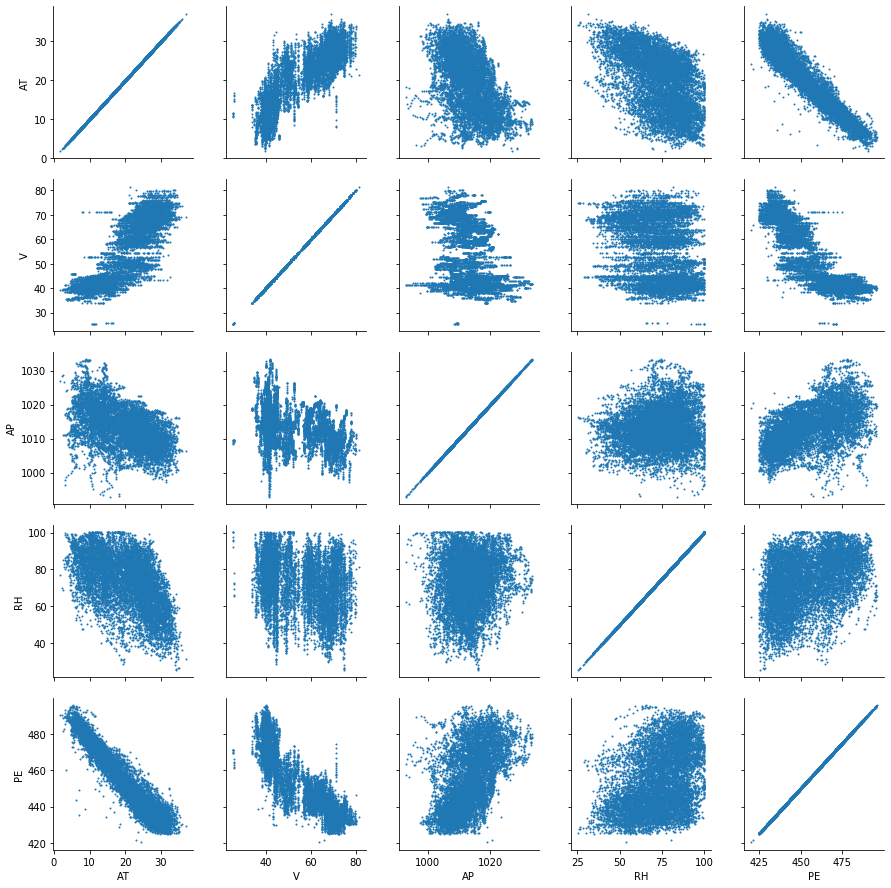

In [2]:
################################################################################
#b.ii.  Make pairwise scatterplots of all the varianbles in the data set 
#including the predictors (independent variables) with the dependent variable.
#Describe your findings.
################################################################################
#df.columns = ['AT', 'V', 'AP', 'RH', 'PE']

print(df.corr())
g = sns.PairGrid(df)
g.map(plt.scatter,s=1)


#### b.ii.  describe
Through observing pairwise scatterplots,  I think that (AT and PE) and (AT and V)  may have stronger linear relationships. 

In [3]:
################################################################################
# b.iii describe the excel
################################################################################
df_describe = df.describe()
print(df_describe)
print('\n')

#遍历每一列
for index, row in df.iteritems():
#     print(index,':')
    print('|',row.mean(), '| ',row.median(), '|', row.max()-row.min(), 
             '|', np.percentile(row, 25),   '|', np.percentile(row, 75),
             '|', np.percentile(row, 75) - np.percentile(row, 25))
    

                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000


| 19.65123118729102 |  20.345 | 35.3 | 13.51 | 25.72 | 12.209999999999999
| 54.30580372073601 |  52.08 | 56.2 | 41.74 | 66.54 | 24.800000000000004
| 1013.2590781772603 |  1012.94 | 40.40999999999997 | 1009.1 | 1017.26 | 8.159999999999968
| 73.30897784280926 |  74.975 | 74.6 | 63.3275 | 84.83 | 21.502499999999998
| 454.3650094063554 |  451.54999999999995 | 7

# <center> summarized data in table </center>
|    |mean | median | range | 25% | 75%| interquartile range|
| :-------: |:-----------:|: --------------------:|:-------:|:-------:|:-------:|:-------:|
| AT | 19.651231187290936 |  20.345 | 35.3 | 13.51 | 25.72 | 12.209999999999999
| V | 54.305803720736016 |  52.08 | 56.2 | 41.74 | 66.54 | 24.800000000000004
| AP | 1013.2590781772602 |  1012.94 | 40.40999999999997 | 1009.1 | 1017.26 | 8.159999999999968
| RH | 73.30897784280887 |  74.975 | 74.6 | 63.3275 | 84.83 | 21.502499999999998
| PE | 454.365009406355 |  451.54999999999995 | 75.5 | 439.75 | 468.43 | 28.680000000000007

AT
coefficient of determination: 0.8989475964148236
intercept: [497.03411989]
slope: [[-2.17131996]]
V
coefficient of determination: 0.7565177870683979
intercept: [517.80152631]
slope: [[-1.16813513]]
AP
coefficient of determination: 0.2687686564110674
intercept: [-1055.26098898]
slope: [[1.48987167]]
RH
coefficient of determination: 0.15193944023117567
intercept: [420.96176616]
slope: [[0.4556501]]


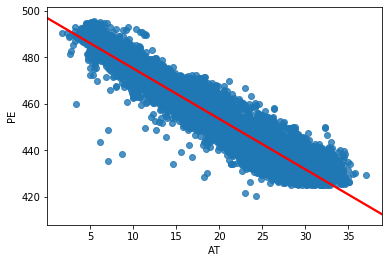

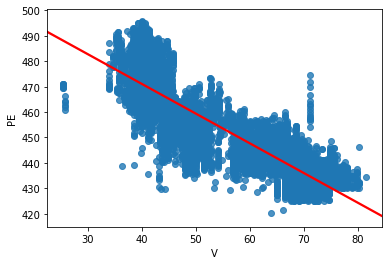

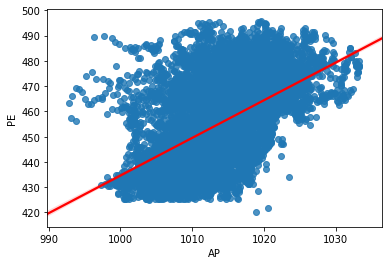

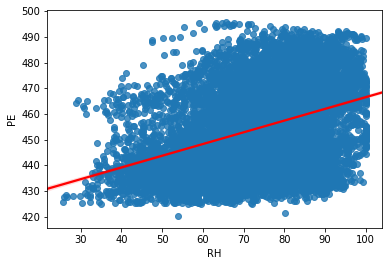

In [4]:
################################################################################
# c. fit a simple linear regression model to predict the response.
################################################################################
#df
#df.columns()
d_x_point = []
for i in df:
    if i != 'PE':
            print(i)
            x = df[[i]].values
            x = x.reshape((-1, 1))
            y = df[['PE']].values
            linreg = LinearRegression()
            linreg.fit(x, y)
            LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
            r_sq = linreg.score(x, y)
            print('coefficient of determination:', r_sq)
            print('intercept:', linreg.intercept_)
            print('slope:', linreg.coef_)
            d_x_point+=linreg.coef_.tolist()
            
# print(d_x_point)
#Fit linear regression models to the scatter plots:
sns.regplot(data=df, x=df['AT'], y=df['PE'], line_kws={"color": "red"})
plt.show()
sns.regplot(data=df, x=df['V'], y=df['PE'], line_kws={"color": "red"})
plt.show()
sns.regplot(data=df, x=df['AP'], y=df['PE'], line_kws={"color": "red"})
plt.show()
sns.regplot(data=df, x=df['RH'], y=df['PE'], line_kws={"color": "red"})
plt.show()


#### c. Describe
As the following table shown, there is a statistically significant association between the predictor and the response.\
For predictors: AT(0.899), V(0.757) have strong relationship for respone: PE.\
And, the predictors: AP. RH do not have such a strong relationship to respone: PE \
I may want to remove some outliners from my data for each regression tasks. \
Also, I printed some plots to back up my assertions. According to these plots, I also found that indeed AT-PE plot is the higher linear relationship than others.

|    |coefficient | intercept | slope|
| :-------: |:-----------:|: --------------------:|:-------:|
|AT|0.8989475964148236|497.03411989|-2.17131996
|V|0.7565177870683979|517.80152631|-1.16813513
|AP|0.2687686564110674|-1055.26098898|1.48987167
|RH|0.15193944023117567|420.96176616|0.4556501|

In [5]:
#d. Fit a multiple regression model to predict the response using all of the predictors.
import statsmodels.api as sm
import numpy as np 

x = df[['AT', 'V', 'AP', 'RH']]
y = df['PE']
# x = sm.add_constant(x.to_numpy())
# if I use the above code, then there would not be warning

x = sm.add_constant(x)
regmodel = sm.OLS(y,x)
results = regmodel.fit()
print(results.params)

d_y_point = []
for i in results.params[1:5]:
    d_y_point.append(i)
#print(d_y_point)
print(results.summary())

const    454.609274
AT        -1.977513
V         -0.233916
AP         0.062083
RH        -0.158054
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:58:48   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------

D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


#### d. Describe
After fitting, there is a statistically significant relationship between the predictor and the response, because after installing multiple regression models, I found that each predictor could be used to reject the null hypothesis H0: beta j = 0, since the assumption values four unpredicted confidence levels, usually 0.05.

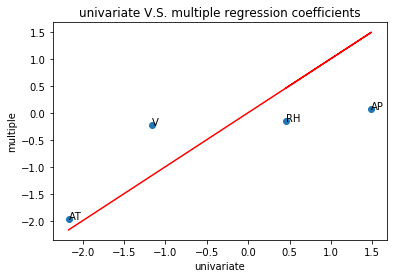

In [6]:
##############################################################
#e.  univariate vs multiple regression
#############################################################
# print(d_y_point)
# print(d_x_point)

plt.scatter(d_x_point, d_y_point)
plt.title('univariate V.S. multiple regression coefficients')
plt.xlabel('univariate')
plt.ylabel('multiple')
name = ['AT', 'V', 'AP','RH']

plt.plot(d_x_point, d_x_point,'r')
plt.annotate('AT',(d_x_point[0][0],d_y_point[0]), xycoords='data')
plt.annotate('V',(d_x_point[1][0],d_y_point[1]), xycoords='data')
plt.annotate('AP',(d_x_point[2][0],d_y_point[2]), xycoords='data')
plt.annotate('RH',(d_x_point[3][0],d_y_point[3]), xycoords='data')
plt.show()


In [7]:
##############################################################
#f.  Polynomial regression
##############################################################
name = ['AT', 'V', 'AP','RH']

for i in range(4):
    print('\" *',name[i],' ******************** \":')
    x_train=df.iloc[:,i].values.reshape(-1, 1)
    y_train= df.iloc[:, -1].values.reshape(-1, 1)

    poly3=PolynomialFeatures(degree=3, interaction_only=False)
    x_train_poly3=poly3.fit_transform(x_train)
    x_train_poly3=sm.add_constant(x_train_poly3)

    regressor_poly3 = sm.OLS( y_train,x_train_poly3)
    regressor_poly3 = regressor_poly3.fit()
    
    print(regressor_poly3.summary())
    print(' ')


" * AT  ******************** ":
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:58:48   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.728

#### f. describe
Yes, there is evidence of nonlinear association between any of the predictors and the
response. According to the p-values, I found out that the most variables have p-values less than 0.05 in terms of one-order term cofficient and quadratic term cofficient and cubic terms cofficient, which indicates they can be used to reject the null hypothesis H0: β1=β2=β3 =0 if the equation is Y=β0+β1X+β2X^2+β3X^3+error.


In [8]:
##############################################################
#g. association of interactions
##############################################################
import statsmodels.formula.api as smf
df = pd.read_excel(excel_name, sheet_name = 0)
df.columns = ['AT', 'V', 'AP', 'RH', 'PE']
x = df[['AT', 'V', 'AP', 'RH']]
#X = df[['AT','V','AP','RH']]
y = df['PE']

poly = PolynomialFeatures(interaction_only=True)
X_poly = poly.fit_transform(x)
X_poly_expan = sm.add_constant(X_poly)     #increase dimension(i.e. add constant 1 in first column) y=kx+b
# regmodel = sm.OLS(y,X_poly_expan)          #OLS : ordinary least square model
#user-defined name
regmodel = smf.ols(formula="y~1 + AT +V+ AP + RH + AT*AT + V*V + AP*AP + RH*RH + AT*V + AT*AP+ AT*RH+ V*AP+V*RH+AP*RH ", 
                                       data=df)
results = regmodel.fit()                   #res.model.endog
# print(results.params)
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:58:50   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

#### g. describe
As the above full linear regression model with some pairwise interaction(AT:V, AT:RH, AP:RH, V:AP), it is easy to show that there is evidence of association of interactions of predictors with the response('PE').  


In [9]:
##################################################################################
#h. improve your model using possible interaction terms or nonlinear association
##################################################################################
excel_name = 'D:/552 Machine Learning for Data Science/homework/Homework2/Folds5x2_pp.xlsx'
wb = xlrd.open_workbook(excel_name)

df = pd.read_excel(excel_name, sheet_name = 0)
df.columns = ['AT', 'V', 'AP', 'RH', 'PE']
X = df[['AT', 'V', 'AP', 'RH']]
Y = df['PE']

#split 70% training data and 30% testing data
X_expan = sm.add_constant(X)                 #increase dimension(i.e. add constant 1 in first column) y=kx+b
x_train, x_test, y_train, y_test = train_test_split(X_expan, Y, test_size=0.3, random_state=100)
#===========================================================================

regmodel = sm.OLS(y_train,x_train)           
results = regmodel.fit()                    
# print(results.summary())
y_train_pred = results.predict(x_train)
y_test_pred = results.predict(x_test)
train_mse = mean_squared_error(y_train,y_train_pred)
test_mse = mean_squared_error(y_test,y_test_pred)
print('=>AT,V,AP,RH')
print('Training MSE value is:', train_mse)
print('Testing MSE value is:', test_mse) #Calculation of Mean Squared Error (MSE) 
print('\n')

#=============================================================================
#Original Data + quadratic nonlinearities(AT,V,AP,RH,ATV,ATAP,ATRH,VAP,VRH,APRH,AT^2,V^2,AP^2,RH^2)
X.loc[:,'ATV']=X.AT*X.V                 #X['ATV']=X.AT*X.V=X.iloc[:, 0]*X.iloc[:, 1]
X.loc[:,'ATAP']=X.AT*X.AP
X.loc[:,'ATRH']=X.AT*X.RH
X.loc[:,'VAP']=X.V*X.AP
X.loc[:,'VRH']=X.V*X.RH
X.loc[:,'APRH']=X.AP*X.RH
X.loc[:,'AT^2']=X.AT*X.AT
X.loc[:,'V^2']=X.V*X.V
X.loc[:,'AP^2']=X.AP*X.AP
X.loc[:,'RH^2']=X.RH*X.RH

X_expan = sm.add_constant(X) 
x_train, x_test, y_train, y_test = train_test_split(X_expan, Y, test_size=0.3, random_state=100)
regmodel = sm.OLS(y_train,x_train)
results = regmodel.fit() 
print(results.summary())

y_train_pred = results.predict(x_train)
y_test_pred = results.predict(x_test)
train_mse = mean_squared_error(y_train,y_train_pred)
test_mse = mean_squared_error(y_test,y_test_pred)
print(' ')
print('=>AT,V,AP,RH,ATV,ATAP,ATRH,VAP,VRH,APRH,AT^2,V^2,AP^2,RH^2')
print('Training MSE value is:', train_mse)
print('Testing MSE value is:', test_mse)
print('\n')

fea = ['AT','V','AP','RH','ATV','ATAP','ATRH','VAP','VRH','APRH','AT^2','V^2','AP^2','RH^2']
print("showing that results are >= 0.05:")
for f in fea:
#     print('fea=',f,'pvalue=',results.pvalues[f])
    if results.pvalues[f] >= 0.05:
        print('fea=',f,'pvalue=',results.pvalues[f])
print('\n')

print("After removing the results(>=0.05), caculate training mse and testing mse:")
X.drop(['ATAP'],axis=1,inplace=True)
X.drop(['VAP'],axis=1,inplace=True)
X.drop(['VRH'],axis=1,inplace=True)
X.drop(['V^2'],axis=1,inplace=True)

X_expan = sm.add_constant(X) 
x_train, x_test, y_train, y_test = train_test_split(X_expan, Y, test_size=0.3, random_state=100)
regmodel = sm.OLS(y_train,x_train)
results = regmodel.fit() 
y_train_pred = results.predict(x_train)
y_test_pred = results.predict(x_test)
train_mse = mean_squared_error(y_train,y_train_pred)
test_mse = mean_squared_error(y_test,y_test_pred)
# print('=>AT,V,AP,RH,ATV,ATRH,APRH,AT^2,AP^2,RH^2')
print('Training MSE value is:', train_mse)
print('Testing MSE value is:', test_mse)
print('\n')


=>AT,V,AP,RH
Training MSE value is: 20.147162782374227
Testing MSE value is: 22.22998126943839


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     7424.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        14:58:54   Log-Likelihood:                -19090.
No. Observations:                6697   AIC:                         3.821e+04
Df Residuals:                    6682   BIC:                         3.831e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## <center> 'orginal' VS 'all interaction' VS 'after removing' </center>
| | AT,V,AP,RH | all interaction | after removing
|: ---:|:--------:|:----------:|:--------:|
|Training MSE |  20.147162782374227|17.517328605981312| 17.53958709698032
|Testing MSE | 22.22998126943839 | 19.505397321949427 |19.572165740846835

#### h. describe
As the above data, we can see before removing the feature which results <0.05, \
the training MSE and testing MSE of 4 features (AT, V, AP, RH) are 20.147162782374227 and 22.22998126943839;\
the training MSE and Testing MSE of all interaction are 17.517328605981312 and  19.505397321949427; \
Comparing with the 4 orginal features, the removing procession is useful;
however, comparing with all interactions, after removing features(ATAP, VAP, VRH, V^2) whose P-values are greater than 0.05  in random_state == 100, the training MSE and Testing MSE are 17.53958709698032 and  19.505397321949427. 

 raw data with random states == 1
#The best K in testing:    5
#The best error in testing:    15.704821203761764
#The best K in training:    1
#The best error in training:    0.0


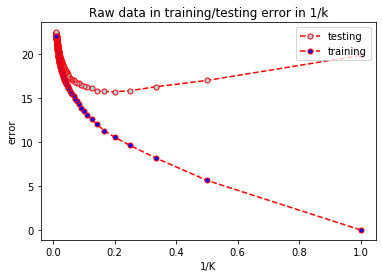

 normalized data with random states == 1
#The best K in testing:    3
#The best error in testing:    1.4845598033673994e-06
#The best K in training:    1
#The best error in training:    0.0


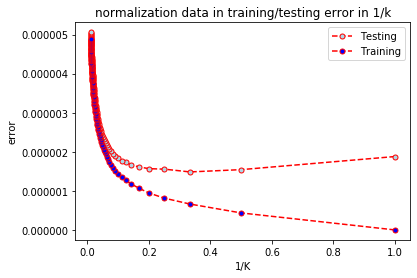

In [10]:
##################################################################################
#i.i.  KNN Regression: 
##################################################################################
excel_name = 'D:/552 Machine Learning for Data Science/homework/Homework2/Folds5x2_pp.xlsx'
wb = xlrd.open_workbook(excel_name)
# print(type(wb))

df = pd.read_excel(excel_name, sheet_name = 0)
df.columns = ['AT', 'V', 'AP', 'RH', 'PE']
x = df[['AT', 'V', 'AP', 'RH']]
y = df['PE']
#================raw============================
K = [i for i in range(1,101,1)]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
error_test = []
error_train = []
for k  in K:
    c_test = 0
    c_train = 0
    knn =  neighbors.KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train,y_train)
    
    y_pred_test = knn.predict(X_test)
    y_pred_train = knn.predict(X_train)
    
    c_test = mean_squared_error(y_test,y_pred_test)
    c_train = mean_squared_error(y_train,y_pred_train)
    error_test = error_test+[c_test]
    error_train = error_train +[c_train]


k_range = np.arange(1,101,1)
#print(error_train)
print(' raw data with random states == 1')
print("#The best K in testing:   ", k_range[error_test.index(min(error_test))])
print("#The best error in testing:   ", min(error_test))
print("#The best K in training:   ", k_range[error_train.index(min(error_train))])
print("#The best error in training:   ", min(error_train))

#===========================================================================
k_range = 1/k_range
plt.plot(k_range, error_test, color='red', linestyle='dashed', marker='o', markerfacecolor='lightblue', markersize=5, label='testing' )
plt.plot(k_range, error_train, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=5, label='training')
plt.xlabel('1/K')
plt.ylabel('error')
plt.title('Raw data in training/testing error in 1/k')
plt.legend(loc='upper right')
plt.show()

# ==========================Normalize ===========================================================
df = pd.read_excel(excel_name, sheet_name = 0)
df= preprocessing.normalize(df.values)
df = pd.DataFrame(df)

# print(df)
df.columns = ['AT', 'V', 'AP', 'RH', 'PE']
x = df[['AT', 'V', 'AP', 'RH']]
y = df['PE']
# x = preprocessing.normalize(x)
# y = preprocessing.normalize(y)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

nor_error_test = []
nor_error_train = []
for k  in K:
    nor_c_test = 0
    nor_c_train = 0
    knn =  neighbors.KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train,y_train)
    
    nor_y_pred_test = knn.predict(X_test)
    nor_y_pred_train = knn.predict(X_train)
    
    nor_c_test = mean_squared_error(y_test,nor_y_pred_test)
    nor_c_train = mean_squared_error(y_train,nor_y_pred_train)
    
    nor_error_test = nor_error_test+[nor_c_test]
    nor_error_train = nor_error_train +[nor_c_train]

    
k_range = np.arange(1,101,1)
print(' normalized data with random states == 1')
print("#The best K in testing:   ", k_range[nor_error_test.index(min(nor_error_test))])
print("#The best error in testing:   ", min(nor_error_test))
print("#The best K in training:   ", k_range[nor_error_train.index(min(nor_error_train))])
print("#The best error in training:   ", min(nor_error_train))


k_range = 1/k_range
plt.plot(k_range, nor_error_test, color='red', linestyle='dashed', marker='o', markerfacecolor='lightblue', markersize=5, label='Testing' )
plt.plot(k_range, nor_error_train, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=5, label='Training')
plt.xlabel('1/K')
plt.ylabel('error')
plt.title('normalization data in training/testing error in 1/k')
plt.legend(loc='upper right')
plt.show()


In [11]:
##################################################################################
#j. compare the results of KNN regression with the linear regression model
##################################################################################
df = pd.read_excel(excel_name, sheet_name = 0)
df.columns = ['AT', 'V', 'AP', 'RH', 'PE']
x = df[['AT', 'V', 'AP', 'RH']]
y = df['PE']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

def try_different_method(clf):
    error = []
    clf.fit(X_train,y_train)
    score = clf.score(X_test, y_test)
    result = clf.predict(X_test)
    mse= mean_squared_error(y_test, result)
    error = error+[mse]
    print(min(error))

from sklearn import linear_model
linear_reg = linear_model.LinearRegression()
print("Linear Regression:")
try_different_method(linear_reg)

from sklearn import neighbors
knn = neighbors.KNeighborsRegressor()
print("KNN regression:")
try_different_method(knn)


Linear Regression:
20.7774781068844
KNN regression:
15.704821203761764


#### j. describe 
Using MSE for comparing KNN regression and Linear Regression with 70% training raw data and 30% testing raw data \
=>Linear Regression: includes all the predictors came out to be about 20.7774. \
=>KNN Regression with "random states"==1: includes all the predictors came out to be 15.7048\
Anyway, based on this information, KNN Regression model is more optimal than Linear Regression model.

In [12]:
#=================Code END===============================

## ISLR 2.4.1
#### (a) Better. 
A flexible method can extract extra information from a larger n. This n can reduce the risk of overfitting. 
#### (b) Worse. 
Because a flexible method may overfit the small number of observations.
#### (c) Better. 
Because in highly non-linear method means more degrees of freedom, a flexible method would be better.
#### (d) Worse. 
The high variance of error terms means that there are more noise in the relationship. So, the inflexible method maybe better. 

## ISLR 2.4.7
### (a)
$ Obs.1 = \sqrt{(0-0)^{2}+(0-3)^{2}+(0-0)^{2}} \tag{2-1} = \sqrt{9} = 3 (Red) $
$ Obs.2 = \sqrt{(0-2)^{2}+(0-0)^{2}+(0-0)^{2}} \tag{2-1} = \sqrt{4} = 2 (Red) $
$ Obs.3 = \sqrt{(0-0)^{2}+(0-1)^{2}+(0-3)^{2}} \tag{2-1} = \sqrt{10} = 3.16 (Red)$
$ Obs.4 = \sqrt{(0-0)^{2}+(0-1)^{2}+(0-2)^{2}} \tag{2-1} = \sqrt{5} = 2.23 (Green)$
$ Obs.5 = \sqrt{(0+1)^{2}+(0-0)^{2}+(0-1)^{2}} \tag{2-1} = \sqrt{2} = 1.41 (Green)$
$ Obs.6 = \sqrt{(0-1)^{2}+(0-1)^{2}+(0-1)^{2}} \tag{2-1} = \sqrt{3} = 1.73 (Red) $

### (b)
from (a) known that Obs.5 is the nearest neightor
<center>So, if k=1, prediction='green'</center>

### (c)
from (a) known that 3rd nearest neightors are Obs.5 Obs.6 Obs.2
so, if k=3,
<center> Pr(red)= 2/3 >  Pr(green)= 1/3  </center>

### (d)
To be small
when the K gets larger, I can get a linear(smoother) Bayes decision boundary.\
linear(Smoother) boundary means more inflexible.\
In this case, in highly nonlinear model, smaller K is better.

In [13]:
#====================END===============================